### MEDIMOS LA CORRELACIÓN ENTRE LAS VARIABLES DEL DF FINAL

In [81]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [82]:
df_analisis = pd.read_csv('../Fase2_Nulos/df_filtrado_notnulls.csv')

In [83]:
df_analisis.sample(20)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
82,no,unknown,3.0,3,1.0,female,3,3,3,divorced,0,none,12,none,2,6,16,13,1985,yes,10.0,53914.11,2.0
1318,no,unknown,10.0,2,4.0,female,4,1,4,single,3,no,17,part_time,0,2,1,0,1986,yes,10.0,28111.13,3.0
988,yes,unknown,2.0,3,1.0,female,3,1,1,married,6,none,14,part_time,1,2,3,2,1997,yes,6.0,20420.00,3.0
1352,no,unknown,5.0,2,2.0,female,3,1,4,unknown,1,no,15,part_time,0,2,0,0,2005,yes,10.0,28111.13,3.0
499,no,travel_rarely,2.0,2,3.0,male,3,2,4,unknown,0,none,22,part_time,1,2,7,7,1976,yes,8.0,45370.00,3.0
806,no,travel_rarely,2.0,4,2.0,male,3,5,1,single,3,none,12,full_time,0,2,2,1,1977,no,22.0,189470.00,2.0
1177,no,unknown,7.0,3,2.0,female,4,1,2,married,1,none,20,part_time,0,3,5,3,1991,yes,5.0,28111.13,1.0
823,no,unknown,7.0,3,2.0,male,4,1,3,single,4,none,12,none,0,2,3,2,1980,yes,10.0,53914.11,3.0
1287,no,non_travel,1.0,5,4.0,male,3,2,4,unknown,4,none,15,none,0,6,1,0,1987,yes,10.0,53914.11,3.0
1009,no,unknown,4.0,4,4.0,male,3,5,1,divorced,4,no,13,full_time,1,2,5,2,1967,yes,28.0,191324.62,3.0


In [84]:
df_analisis.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


### DOCUMENTACIÓN DESCRIBE NOE

### CORRELACIÓN VARIABLES NUMÉRICAS

In [85]:
df_correlaciones = df_analisis.select_dtypes(include=['number']).corr(method="pearson")
df_correlaciones

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.000000,0.027864,-0.019420,0.020938,0.008120,0.004403,-0.007573,0.057036,0.067375,-0.051308,0.010439,0.013331,0.003625,-0.000816,-0.012235,-0.032258
education_level,0.027864,1.000000,-0.037240,0.043048,0.100346,-0.006928,0.116021,-0.009138,0.012767,-0.039725,0.070010,0.068201,-0.201536,0.125259,0.093245,0.021237
environmental_satisfaction_level,-0.019420,-0.037240,1.000000,-0.007909,0.007135,0.008300,-0.001017,-0.040069,0.008002,-0.048562,0.008301,-0.004162,-0.015337,0.012955,0.009222,0.047702
job_involvement_level,0.020938,0.043048,-0.007909,1.000000,-0.000297,-0.020332,0.026374,-0.004661,0.035480,-0.012010,-0.015409,0.040507,-0.036568,0.022475,-0.017915,-0.013044
job_level,0.008120,0.100346,0.007135,-0.000297,1.000000,-0.015388,0.143060,-0.041995,0.022030,-0.026059,0.532415,0.365260,-0.507748,0.620530,0.882054,0.021209
job_satisfaction_level,0.004403,-0.006928,0.008300,-0.020332,-0.015388,1.000000,-0.054967,0.027774,0.013897,0.003339,-0.006868,-0.034596,0.010725,-0.024691,0.000526,-0.024389
num_companies_worked,-0.007573,0.116021,-0.001017,0.026374,0.143060,-0.054967,1.000000,-0.003378,0.039339,-0.080868,-0.129465,-0.119690,-0.289166,0.210844,0.110463,-0.012054
percent_salary_hike,0.057036,-0.009138,-0.040069,-0.004661,-0.041995,0.027774,-0.003378,1.000000,0.011043,-0.006836,-0.041213,-0.010821,-0.006728,-0.031841,-0.029821,0.001218
stock_option_level,0.067375,0.012767,0.008002,0.035480,0.022030,0.013897,0.039339,0.011043,1.000000,0.007315,0.013781,0.027543,-0.039405,0.050299,0.014915,-0.006032
training_sessions_last_year,-0.051308,-0.039725,-0.048562,-0.012010,-0.026059,0.003339,-0.080868,-0.006836,0.007315,1.000000,0.008089,0.008678,0.031776,-0.063411,-0.025426,0.018330


🔍 Observaciones Claves NOE

    Variables fuertemente correlacionadas con job_level y annual_salary

        job_level tiene una alta correlación con annual_salary (0.88). Esto tiene sentido porque a mayor nivel laboral, mayor salario.

        total_years_worked también está muy correlacionado con job_level (0.62) y annual_salary (0.56).

    Edad y Experiencia vs. Permanencia en la Empresa

        birth_year está fuertemente correlacionado de manera negativa con total_years_worked (-0.55) y annual_salary (-0.45).** Esto sugiere que los empleados más jóvenes han trabajado menos años en general y tienen salarios más bajos.

        years_at_company y years_with_current_manager están muy correlacionados entre sí (0.76), lo cual es lógico.

    Factores de Satisfacción y Rotación

        environmental_satisfaction_level, job_satisfaction_level y work_life_balance tienen correlaciones bajas con otras variables. Esto podría indicar que la satisfacción laboral es más subjetiva y menos dependiente de factores numéricos como el salario o los años trabajados.

    Otros hallazgos interesantes

        num_companies_worked tiene una relación positiva con total_years_worked (0.21), lo que sugiere que las personas con más experiencia han cambiado más de empresa.

        education_level tiene una correlación moderada con total_years_worked (0.12), pero una correlación negativa con birth_year (-0.20), lo que indica que los empleados mayores pueden haber tenido menos nivel educativo en promedio.

### CÓDIGO Y GRÁFICA DE ISA PARA EL ESPEJO

In [86]:
## COREGIR CON EL CÓDIGO DE ISA# Filtrar las correlaciones en los rangos deseados
df_filtrado = df_correlaciones[
    ((df_correlaciones >= 0.5) & (df_correlaciones <= 1)) | 
    ((df_correlaciones <= -0.5) & (df_correlaciones >= -1))
]

# Ver el DataFrame filtrado
display(df_filtrado)

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environmental_satisfaction_level,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_involvement_level,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_level,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.532415,NaN,-0.507748,0.620530,0.882054,NaN
job_satisfaction_level,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_companies_worked,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_salary_hike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stock_option_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
training_sessions_last_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


#### VALORACIÓN DE LOS RESULTADOS OBTENIDOS

Según los datos que arrojan los métodos de correlación realizados tanto con el Método de Pearson como de Spearman no podemos obtener conclusiones relevantes en cuanto a la rotación de los empleados en la empresa. Con este primer análisis se ha realizado una correlación de las variables numéricas. 

### CORRELACIÓN VARIABLES CATEGÓRICAS

In [87]:
df_categ = df_analisis.select_dtypes(include = 'object')

In [88]:
df_categ.describe().T

,count,unique,top,freq
employee_turnover,1614,2,no,1355
business_travel_frequency,1614,4,unknown,772
gender,1614,2,female,971
marital_status,1614,4,unknown,651
overtime_hours,1614,3,no,682
standard_work_hours,1614,3,part_time,888
remote_work,1614,2,yes,1000


## NOE. Análisis de las Variables Categóricas

    Rotación de empleados (employee_turnover)

        Hay 1614 empleados en total.

        1355 empleados no han renunciado ("no"), mientras que 259 sí lo han hecho.

        Esto sugiere un desbalance en los datos, lo que podría afectar modelos predictivos (sería importante considerar técnicas como oversampling o undersampling).

    Frecuencia de viajes (business_travel_frequency)

        La categoría más frecuente es "unknown" (772 casos).

        Es preocupante que haya muchos valores desconocidos, lo que podría afectar el análisis.

        Podría valer la pena investigar si los valores "unknown" pueden ser imputados o descartados.

    Género (gender)

        Predominan los hombres (971 casos) frente a las mujeres (643 casos).

        Podría analizarse si hay diferencias en rotación por género.

    Estado civil (marital_status)

        Hay muchos valores "unknown" (651 casos), lo que nuevamente sugiere problemas con la calidad de los datos.

        Si esta variable fuera relevante, podríamos considerar estrategias de imputación.

    Horas extra (overtime_hours)

        La mayoría de empleados no hacen horas extra (682 casos).

        Puede ser interesante ver si hay relación entre hacer horas extra y la rotación.

    Tipo de jornada (standard_work_hours)

        888 empleados trabajan a tiempo parcial.

        Esto puede ser un factor relevante para analizar la rotación.

    Trabajo remoto (remote_work)

        1000 empleados trabajan en remoto (lo cual es la mayoría).

        Podríamos analizar si el trabajo remoto reduce la rotación.

### Género (gender) vs. Rotación

    ¿Hay diferencias en la rotación entre hombres y mujeres?

Trabajo Remoto (remote_work) vs. Rotación

    ¿Los empleados remotos tienen menor rotación que los presenciales?

Horas Extra (overtime_hours) vs. Rotación

    ¿Los empleados que hacen horas extra tienen más probabilidades de renunciar?

Frecuencia de Viajes (business_travel_frequency) vs. Rotación

    ¿Viajar más está relacionado con mayor rotación?

Estado Civil (marital_status) vs. Rotación

    ¿El estado civil influye en la permanencia en la empresa?

## ROTACIÓN DE EMPLEADOS SEGÚN SU GÉNERO

<Axes: xlabel='employee_turnover', ylabel='count'>

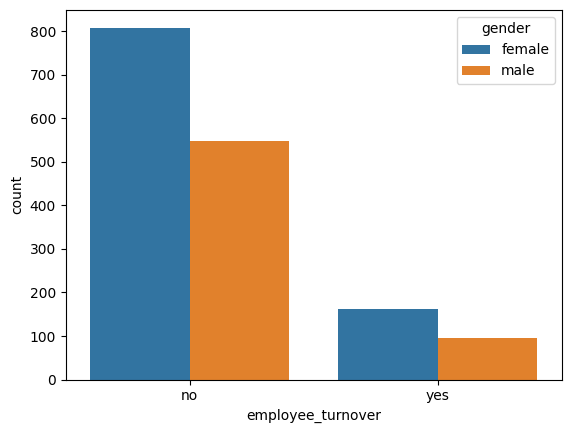

In [89]:
sns.countplot(x='employee_turnover',hue = 'gender',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN SU FRECUENCIA DE VIAJES

<Axes: xlabel='employee_turnover', ylabel='count'>

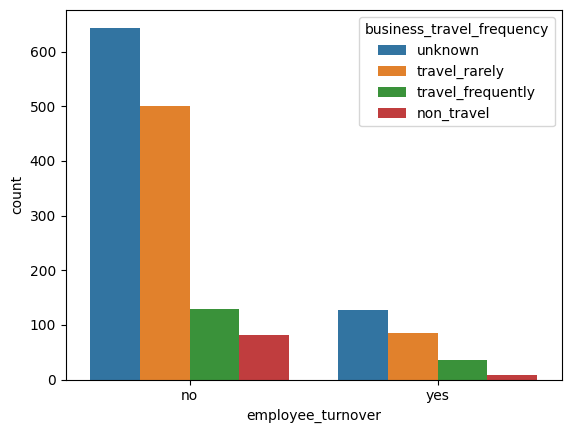

In [90]:
sns.countplot(x='employee_turnover',hue = 'business_travel_frequency',data=df_categ)

#### COMENTAR GRÁFICA

### ROTACIÓN DE EMPLEADOS SEGÚN SU ESTADO CIVIL

<Axes: xlabel='employee_turnover', ylabel='count'>

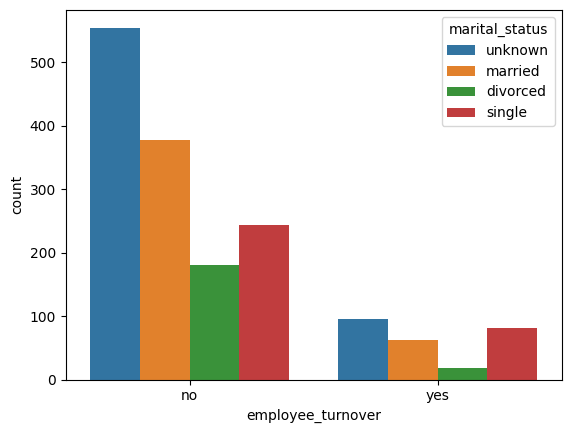

In [91]:
sns.countplot(x='employee_turnover',hue = 'marital_status',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN LAS HORAS EXTRAS

<Axes: xlabel='employee_turnover', ylabel='count'>

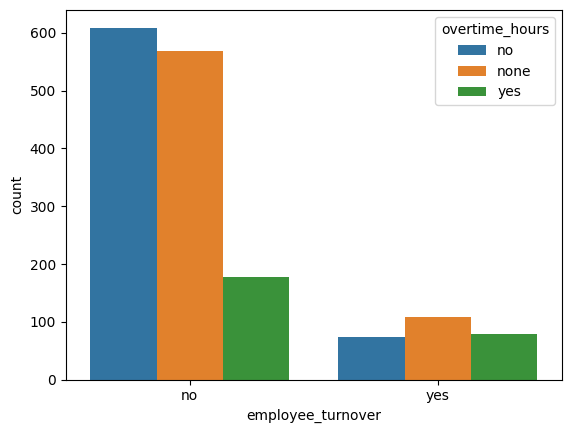

In [92]:
sns.countplot(x='employee_turnover',hue = 'overtime_hours',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE LA JORNADA LABORAL

<Axes: xlabel='employee_turnover', ylabel='count'>

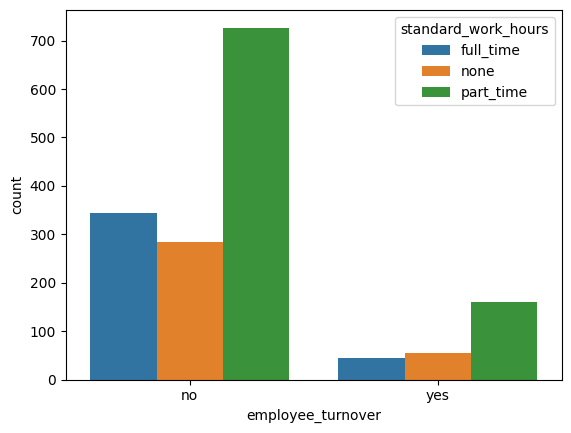

In [93]:
sns.countplot(x='employee_turnover',hue = 'standard_work_hours',data=df_categ)

### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE TELE_TRABAJO

<Axes: xlabel='employee_turnover', ylabel='count'>

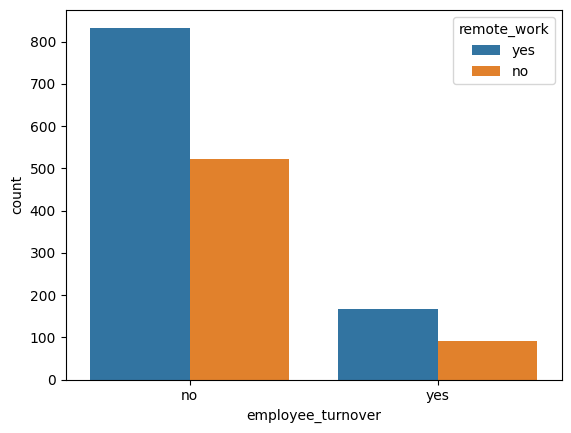

In [94]:
sns.countplot(x='employee_turnover',hue = 'remote_work',data=df_categ)

### COMENTAR GRÁFICA

🔍 Observaciones de los Gráficos

    Género vs. Rotación

        Parece que hombres y mujeres tienen niveles de rotación similares, aunque hay más hombres en la muestra.

    Trabajo Remoto vs. Rotación

        La mayoría de los empleados trabajan en remoto, y la rotación no parece variar mucho entre los grupos.

    Horas Extra vs. Rotación

        Hay más empleados que no hacen horas extra, pero los que sí hacen parecen tener una rotación mayor.

        Esto sugiere que las horas extra podrían estar relacionadas con el desgaste y la rotación.

    Frecuencia de Viajes vs. Rotación

        Hay muchos valores "unknown", lo cual dificulta el análisis.

        Los empleados que viajan con más frecuencia parecen tener mayor rotación que los que no viajan.

    Estado Civil vs. Rotación

        Hay muchos valores "unknown".

        Parece que los empleados solteros tienen más rotación que los casados/divorciados.

### MEDICIONES COLUMNAS DE SATISFACCIÓN

In [95]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [96]:
df_satisf = df_analisis[['environmental_satisfaction_level', 'job_involvement_level','job_satisfaction_level', 'work_life_balance']]

In [97]:
df_satisf.describe().T

,count,mean,std,min,25%,50%,75%,max
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.0,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
work_life_balance,1614.0,2.775713,0.681347,1.0,2.0,3.0,3.0,4.0


## COMENTAR NOE

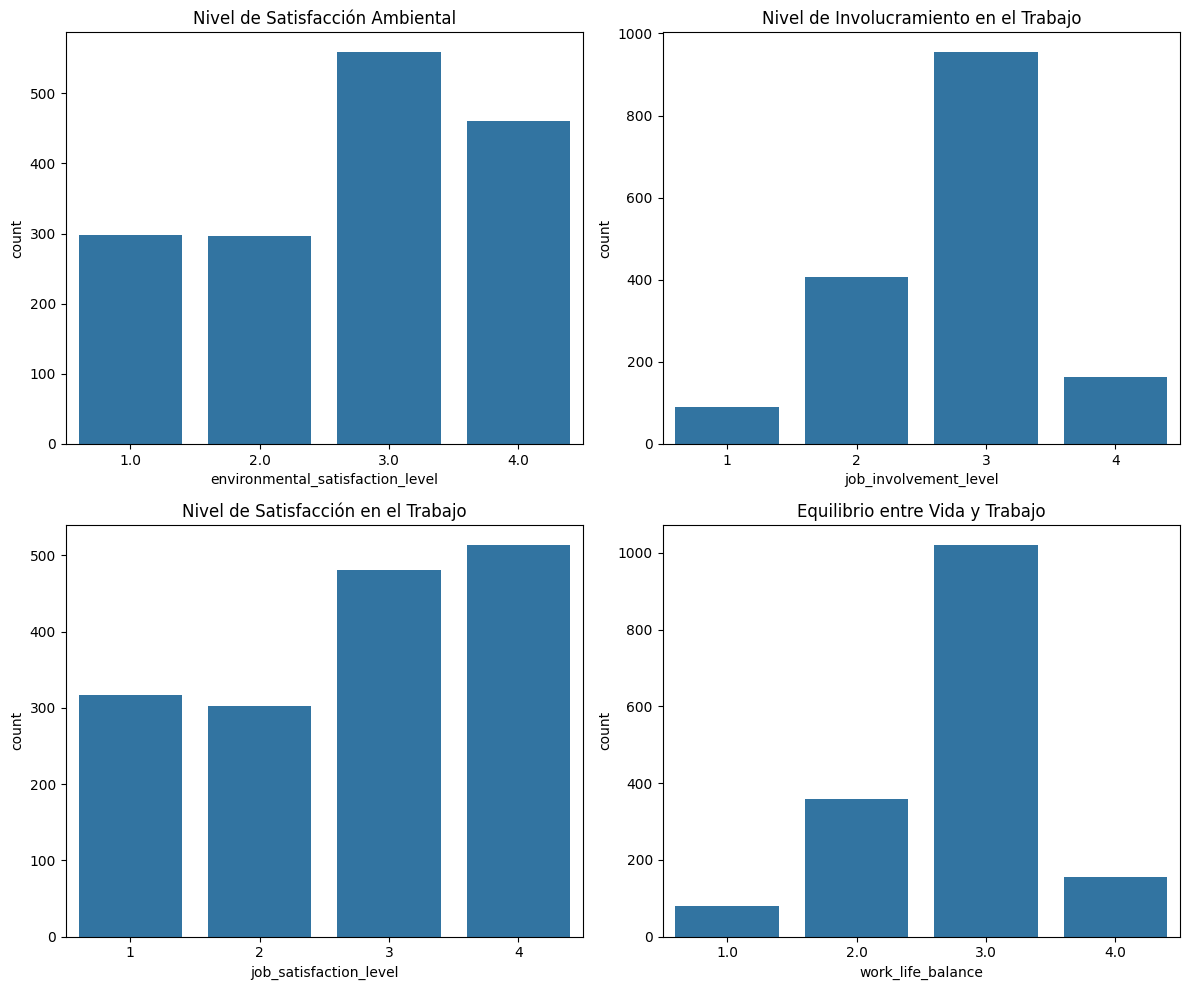

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subgráficos para cada columna de satisfacción
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas

# Graficar cada columna en un subgráfico
sns.countplot(data=df_analisis, x='environmental_satisfaction_level', ax=axes[0, 0])
axes[0, 0].set_title('Nivel de Satisfacción Ambiental')

sns.countplot(data=df_analisis, x='job_involvement_level', ax=axes[0, 1])
axes[0, 1].set_title('Nivel de Involucramiento en el Trabajo')

sns.countplot(data=df_analisis, x='job_satisfaction_level', ax=axes[1, 0])
axes[1, 0].set_title('Nivel de Satisfacción en el Trabajo')

sns.countplot(data=df_analisis, x='work_life_balance', ax=axes[1, 1])
axes[1, 1].set_title('Equilibrio entre Vida y Trabajo')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

#### COMENTAR GRÁFICAS NOE

### ANÁLISIS DE LOS NIVELES DE SATISFACCIÓN RESPECTO A DIFERENTES VARIABLES

In [99]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [100]:
# tablas de contingencia comparando los diferentes niveles de satisficción del empleado cruzándola con employee_turnover (nivel de rotación).
#Genera una tabla por cada variable de satisfacción, cruzándola con employee_turnover. Usa normalize=True para mostrar los datos en porcentajes.

for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['employee_turnover'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level        1.0        2.0        3.0       4.0
employee_turnover                                                          
no                                13.754647  15.551425  29.925651  24.72119
yes                                4.708798   2.850062   4.708798   3.77943 

Tabla de contingencia para job_involvement_level:
 job_involvement_level         1          2          3        4
employee_turnover                                             
no                     3.531599  20.446097  50.681537  9.29368
yes                    1.982652   4.708798   8.488228  0.86741 

Tabla de contingencia para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
employee_turnover                                                 
no                      15.303594  15.427509  25.092937  28.128872
yes                      4.337051   3.283767   4.708798   3.717472 

Tabla

Estas tablas nos muestran como los empleados que menos han rotado ("employee_turnover") presentan mayores ninveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral.

In [101]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['education_level'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
education_level                                                           
1                                 1.610905  2.230483   4.151177   3.159851
2                                 3.593556  3.841388   6.133829   5.885998
3                                 6.753408  6.319703  14.250310  11.152416
4                                 5.947955  5.018587   9.355638   7.249071
5                                 0.557621  0.991326   0.743494   1.053284 

Tabla de contingencia para job_involvement_level:
 job_involvement_level         1         2          3         4
education_level                                               
1                      0.867410  3.035936   6.629492  0.619579
2                      0.929368  5.390335  11.152416  1.982652
3                      1.982652  9.107807  22.924411  4.460967
4                      1.548947  6.939281  16

Estas tablas nos muestran como los empleados que tienen un nivel educativo mayor ("education_level") presentan mayores ninveles de satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles educativos.

In [102]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['gender'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level        1.0        2.0        3.0        4.0
gender                                                                      
female                            11.152416  11.028501  20.631970  17.348203
male                               7.311029   7.372986  14.002478  11.152416 

Tabla de contingencia para job_involvement_level:
 job_involvement_level         1          2          3         4
gender                                                         
female                 3.469641  14.560099  35.811648  6.319703
male                   2.044610  10.594796  23.358116  3.841388 

Tabla de contingencia para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
gender                                                            
female                  11.586121  10.656753  17.534077  20.384139
male                     8.054523   8.054523  12.267658  11.462206

Estas tablas nos muestran como la variable de género influye en los niveles de satisfación:
-En general las mujeres muestran un mayor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados de sexo masculino

In [103]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['job_level'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
job_level                                                                 
1                                 6.691450  6.939281  12.701363   9.975217
2                                 6.381660  7.249071  12.267658  11.090458
3                                 2.912020  2.540273   5.947955   3.593556
4                                 1.548947  0.867410   2.416357   2.168525
5                                 0.929368  0.805452   1.301115   1.672862 

Tabla de contingencia para job_involvement_level:
 job_involvement_level         1         2          3         4
job_level                                                     
1                      2.168525  9.107807  21.189591  3.841388
2                      2.230483  8.736059  22.057001  3.965304
3                      0.619579  4.399009   8.798017  1.177200
4                      0.185874  1.796778   4

Estas tablas nos muestran como la variable de nivel del nivel jerárquico del puesto del empleado influye en los niveles de satisfación:
-En general se puede observar que a mayor nivel gerarquico del puesto del empleado, presentan un menor grado de nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados con menores niveles jerarquicos. 

In [104]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['overtime_hours'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
overtime_hours                                                            
no                                8.116481  8.054523  14.436183  11.648079
none                              7.744734  7.372986  14.807931  11.957869
yes                               2.602230  2.973978   5.390335   4.894672 

Tabla de contingencia para job_involvement_level:
 job_involvement_level         1          2          3         4
overtime_hours                                                 
no                     2.354399  11.028501  24.535316  4.337051
none                   2.044610  10.099133  25.464684  4.275093
yes                    1.115242   4.027261   9.169765  1.548947 

Tabla de contingencia para job_satisfaction_level:
 job_satisfaction_level         1         2          3          4
overtime_hours                                                  
no    

Estas tablas nos muestran como si el empleado trabaja horas extras (Yes/No) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan horas extras presentan menor nivel de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no hacen horas extras. 

In [105]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['standard_work_hours'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0        2.0        3.0        4.0
standard_work_hours                                                        
full_time                         4.708798   4.275093   8.178439   6.877323
none                              4.213135   4.089219   6.381660   6.257745
part_time                         9.541512  10.037175  20.074349  15.365551 

Tabla de contingencia para job_involvement_level:
 job_involvement_level         1          2          3         4
standard_work_hours                                            
full_time              1.548947   6.505576  13.692689  2.292441
none                   1.177200   4.646840  12.701363  2.416357
part_time              2.788104  14.002478  32.775713  5.452292 

Tabla de contingencia para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
standard_work_hours                                             

Estas tablas nos muestran como la clasificación de jornada (Full Time/Part Time) influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan part time presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que trabajan full time. 

In [106]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['years_at_company'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0       3.0       4.0
years_at_company                                                        
0                                 0.371747  0.743494  0.743494  0.867410
1                                 2.044610  1.920694  3.655514  2.973978
2                                 1.920694  1.363073  2.973978  2.478315
3                                 2.416357  1.239157  2.478315  2.602230
4                                 1.425031  1.115242  2.292441  2.230483
5                                 2.540273  1.982652  4.708798  3.655514
6                                 0.495663  1.239157  1.920694  1.177200
7                                 0.805452  1.672862  2.168525  2.478315
8                                 0.991326  1.177200  2.912020  1.486989
9                                 0.867410  1.053284  2.044610  1.858736
10                                1.425031  2.230483  2.540273

Estas tablas nos muestran como los años en la compañia influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados tienen menos años en la empresa presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen más años trabajando en la empresa. 

In [107]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['birth_year'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0       3.0       4.0
birth_year                                                              
1963                              0.123916  0.000000  0.185874  0.000000
1964                              0.123916  0.123916  0.371747  0.000000
1965                              0.123916  0.123916  0.123916  0.557621
1966                              0.061958  0.061958  0.061958  0.123916
1967                              0.185874  0.061958  0.371747  0.433705
1968                              0.185874  0.185874  0.681537  0.495663
1969                              0.247831  0.123916  0.371747  0.495663
1970                              0.309789  0.123916  0.371747  0.433705
1971                              0.185874  0.123916  0.495663  0.371747
1972                              0.371747  0.247831  0.433705  0.185874
1973                              0.371747  0.309789  0.557621

Estas tablas nos muestran como la edad influye en los niveles de satisfación:
-En general se puede observar que mientras los empleados tienen más edad presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados más jóvenes.

In [108]:
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['remote_work'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level        1.0        2.0        3.0        4.0
remote_work                                                                 
no                                 6.939281   6.877323  13.630731  10.594796
yes                               11.524164  11.524164  21.003717  17.905824 

Tabla de contingencia para job_involvement_level:
 job_involvement_level         1          2          3         4
remote_work                                                    
no                     1.672862  10.037175  22.428748  3.903346
yes                    3.841388  15.117720  36.741016  6.257745 

Tabla de contingencia para job_satisfaction_level:
 job_satisfaction_level          1          2          3          4
remote_work                                                       
no                       7.930607   7.311029  11.586121  11.214374
yes                     11.710037  11.400248  18.215613  20.631970

Estas tablas nos muestran como si el pleado trabaja en remoto (yes/no) remoto influye en los niveles de satisfación:
-En general se puede observar que cuando los empleados trabajan en remoto, presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que no trabajan de manera remota. 

In [109]:
# Definir rangos de salario (puedes ajustarlos según necesidad)
bins = [0, 30000, 60000, 90000, 120000, 200000]  # Límites de los grupos
labels = ['0-30e', '30e-60e', '60e-90e', '90e-120e', '120e+']  # Etiquetas para los grupos

# Crear una nueva columna categórica en df_analisis
df_analisis['salary_range'] = pd.cut(df_analisis['annual_salary'], bins=bins, labels=labels)

# Crear tablas de contingencia para cada variable de satisfacción
for col in ['environmental_satisfaction_level', 'job_involvement_level', 'job_satisfaction_level', 'work_life_balance']:
    tc = pd.crosstab(df_analisis['salary_range'], df_analisis[col], normalize=True) * 100
    print(f"Tabla de contingencia para {col}:\n", tc, "\n")

Tabla de contingencia para environmental_satisfaction_level:
 environmental_satisfaction_level       1.0       2.0        3.0        4.0
salary_range                                                              
0-30e                             4.832714  4.460967   9.541512   7.001239
30e-60e                           8.488228  9.727385  15.241636  14.064436
60e-90e                           1.053284  0.867410   1.982652   1.486989
90e-120e                          2.044610  1.796778   4.708798   2.540273
120e+                             2.044610  1.548947   3.159851   3.407683 

Tabla de contingencia para job_involvement_level:
 job_involvement_level         1          2          3         4
salary_range                                                   
0-30e                  1.425031   6.753408  14.807931  2.850062
30e-60e                2.726146  11.152416  28.438662  5.204461
60e-90e                0.371747   1.363073   3.097893  0.557621
90e-120e               0.495663   3.2218

Estas tablas nos muestran como el salario anual influye en los niveles de satisfación del empleado:
-En general se puede observar que a mayor salario, los emmpleados presentan presentan mayores niveles de sastifacción respecto a satisfacción ambiental, nivel de compromiso del empleado en el trabajo, satisfacción general en el puesto, y nivel de balance entre vida personal y laboral, respecto a los empleados que tienen un salario anual menor. 